# Octa Puzzle Problem

Consider the Octa puzzle of arranging the first sixteen positive numbers, 1 to 16 on an 'octagon' shaped grid as shown below where the sum of the numbers on the corner nodes is equal to 34. Similarly, the sum of any four numbers in a line (horizontal, vertical or other sides) is also equal to 34 as shown below.

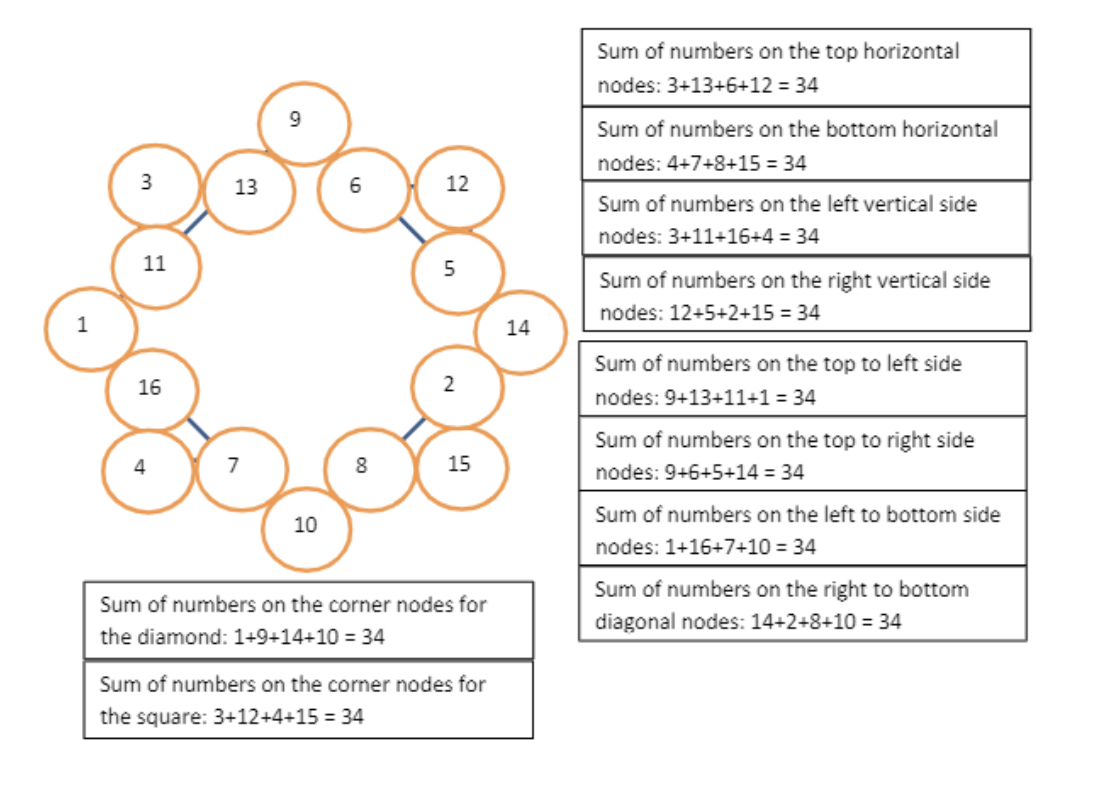
<center>Fig 1 : The Octa Puzzle Problem</center>

The Octa puzzle can be solved by numerous ways. One such way is to visualize this as a 4x4 matrix.

<br>

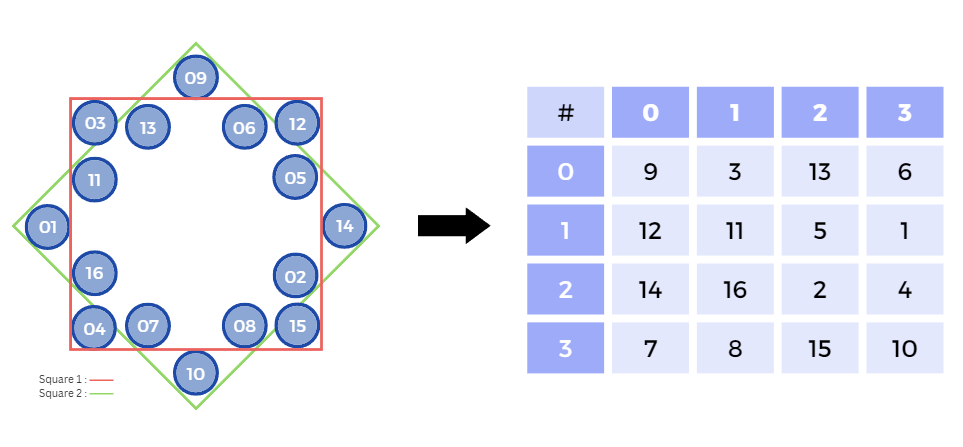
<center>Fig 2 : Representing in a 4x4 matrix</center>

<br>

This makes the puzzle much more simpler to visualize and understand. Our goal is to create such set of numbers whose diagonals, sides and corners (as shown in fig 1) add to 34. This can be achieved using AIMA-Python search algorithms.

Although calculating and solving this matrix from null is not computationally feasible. A better solution would be to provide the algorithm with some pre-filled cells and let the machine do it's magic.

<br>

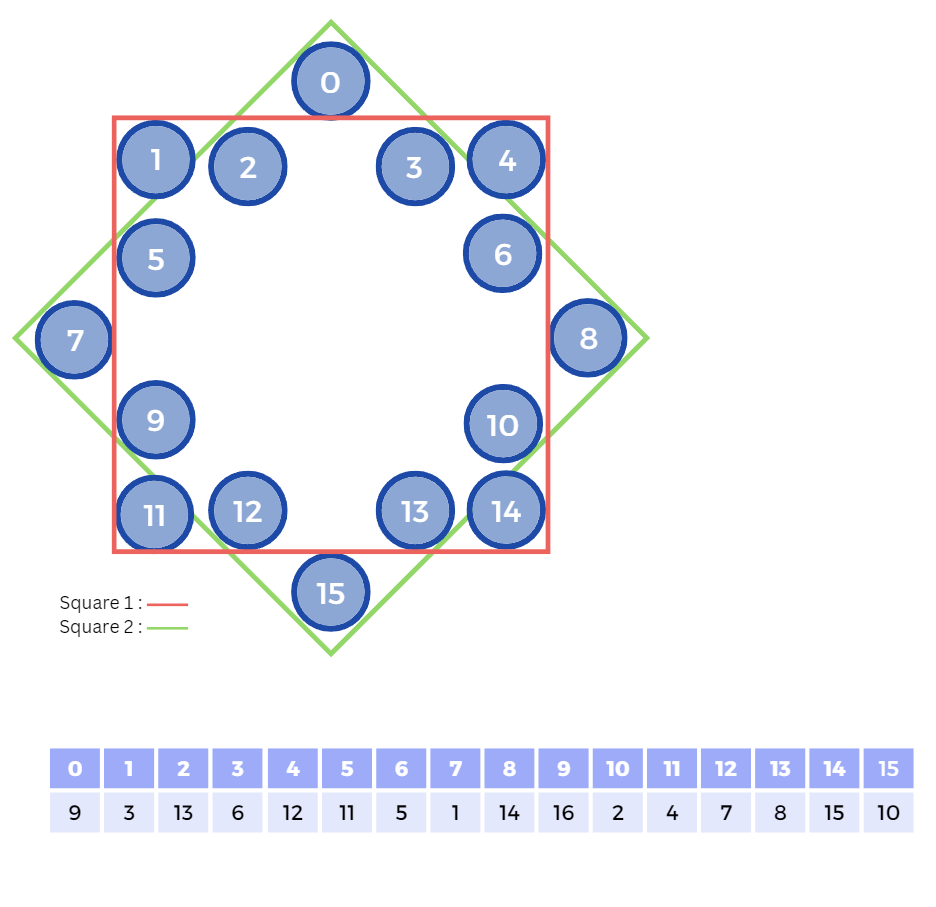
<center>Fig 3 : Index view of the puzzle and representing the corresponding values in an array of length 16.

## Code Explanation

The AIMA-Python class Problem has 5 functions.
- `__init__` : a constructor function that initializes the initial state and the goal state.
- `actions` : a function that returns the set of actions the agent has to do in the next state. In this case, it's returning the set of missing values in a given state.
- `result` : a function that gets the actions returned value and executes it one by one to check if it reached the goal state. In this case, it's returning the tuple with the action value inserted.
- `is_goal` : a function to check if the given state is in the goal state. In this case, it checks for the sum condition of 34 and returns true.
- `h` : a function to calculate the heuristic factor. In this case, we use Manhattan distance formula. For every current node state is compared with the end goal state, a <i>h</i> factor is determined. 

<br>

### Example solution to prove the use of heuristic factor:

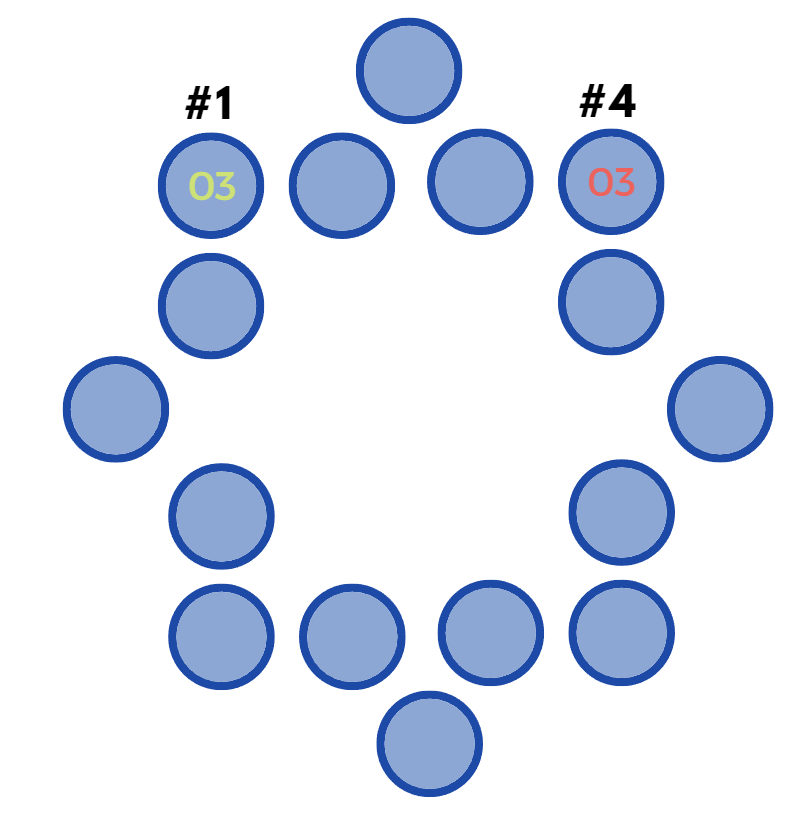
<center>Fig 4: Example for h-factor</center>
<br>

Consider this example, where the algorithm added 3 in the 4th index, but the end goal state showed 3 in index 1. Therefore the distance between these two is 4 cells. Now consider another example, where the algorithm added 3 in the correct index this time, at index 1.


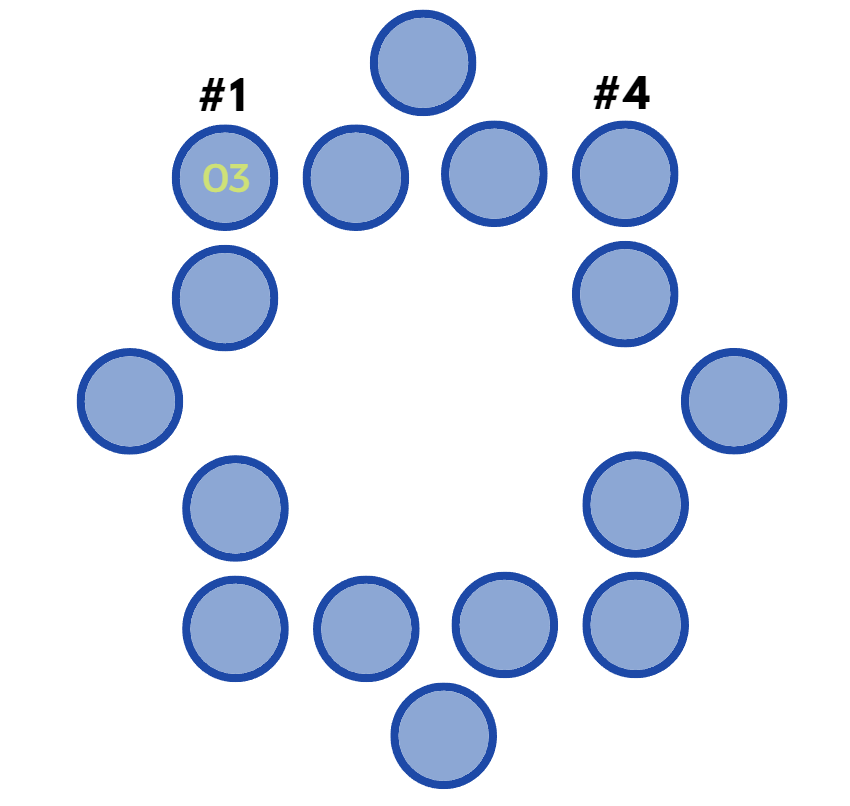
<center>Fig 5: Example for h-factor</center>

<br>

The distance calculated for this solution is 0, as both the current state and the goal state positions are the same. Hence the lesser the h factor, the agent becomes more efficient.

In [1]:
# modules from aima-python
from aima_search import *

class OctaPuzzle(Problem):
    """
    The state is represented as a tuple of length 16, where the elements at indexes 
    (1, 5, 9, 11), (11, 12, 13, 14), (14, 10, 6, 4), (1, 2, 3, 4) and
    (0, 2, 5, 7), (0, 3, 6, 8), (8, 10, 13, 15), (15, 12, 9, 7)
    are the sides of square 1 and square 2 respectively. (fig 3)
    
    Also elements at indexes (1, 4, 11, 14) and (0, 7, 15, 8) are the corners of square 1
    and square 2 respectively (fig 3). 
    
    The individual value sum of all these set of positions should equate to 34.
    e.g. the goal:
             09         
       03 13    06 12   
       11          05   
    01                14       => (9, 3, 13, 6, 12, 11, 5, 1, 14, 16, 2, 4, 7, 8, 15, 10)
       16          02   
       04 07    08 15   
             10        
    """
    
    def __init__(self, initial, goal=(9, 3, 13, 6, 12, 11, 5, 1, 14, 16, 2, 4, 7, 8, 15, 10)):
        self.initial, self.goal = initial, goal
    
    
    def actions(self, state):
        missing_nos = []
        for i in range(1, 17):
            if i not in state:
                missing_nos.append(i) 
        return missing_nos
    
    
    def result(self, state, action):
        s = list(state)
        blank = state.index(0)
        s[blank] = action
        return tuple(s)
    
    
    def is_goal(self, state):   
        # check if sum = 34
        if state[0] + state[2] + state[5] + state[7] == 34 and \
        state[0] + state[3] + state[6] + state[8] == 34 and \
        state[8] + state[10] + state[13] + state[15] == 34 and \
        state[15] + state[12] + state[9] + state[7] == 34 and \
        state[1] + state[5] + state[9] + state[11] == 34 and \
        state[11] + state[12] + state[13] + state[14] == 34 and \
        state[14] + state[10] + state[6] + state[4] == 34 and \
        state[4] + state[3] + state[2] + state[1] == 34 and \
        state[1] + state[11] + state[14] + state[4] == 34 and \
        state[0] + state[7] + state[15] + state[8] == 34:
            return True

    def h1(self, node):
        """The misplaced tiles heuristic."""
        return hamming_distance(node.state, self.goal)
    
    def h(self, node):
        """The Manhattan heuristic."""
        X = (0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3)
        Y = (0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3)

        return sum(abs(X[s-1] - X[g-1]) + abs(Y[s-1] - Y[g-1])
                   for (s, g) in zip(node.state, self.goal) if s != 0)
            
    
def hamming_distance(A, B):
    "Number of positions where vectors A and B are different."
    return sum(a != b for a, b in zip(A, B))

In [2]:
# function to print the tuple in the shape of an octagon
def pretty_printed_puzzle(ind, value):
    ans = []
    for i in value:
        val = str(i)
        if len(val) == 1:
            val = "0" + val
        if i == 0:
            val = "__"
        ans.append(val)
    
    print("         "+ans[0]+"         ")
    print("   "+ans[1]+" "+ans[2]+"    "+ans[3]+" "+ans[4]+"   ")
    print("   "+ans[5]+"          "+ans[6]+"   ")
    print(""+ans[7]+"                "+ans[8]+"" + "       Step #"+str(ind))
    print("   "+ans[9]+"          "+ans[10]+"   ")
    print("   "+ans[11]+" "+ans[12]+"    "+ans[13]+" "+ans[14]+"   ")
    print("         "+ans[15]+"         ")
    print()

In [3]:
# completed = OctaPuzzle((9, 3, 13, 6, 12, 11, 5, 1, 14, 16, 2, 4, 7, 8, 15, 10))
# empty = OctaPuzzle((0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
e1 = OctaPuzzle((0, 0, 0, 0, 12, 0, 5, 1, 14, 0, 2, 4, 0, 8, 15, 10)) #7
e2 = OctaPuzzle((9, 3, 13, 6, 12, 11, 0, 1, 14, 16, 2, 4, 7, 8, 15, 10)) #1
e3 = OctaPuzzle((9, 3, 13, 6, 12, 11, 0, 1, 14, 16, 2, 4, 7, 0, 0, 0)) # 3
e4 = OctaPuzzle((9, 3, 13, 6, 12, 11, 0, 1, 14, 0, 0, 4, 7, 0, 0, 0)) # 5
e5 = OctaPuzzle((9, 3, 13, 6, 12, 0, 0, 1, 14, 0, 0, 4, 7, 0, 0, 0)) # 6

In [4]:
# Using breadth first search for e1
for ind, s in enumerate(path_states(breadth_first_search(e1))):
    pretty_printed_puzzle(ind, s)

         __         
   __ __    __ 12   
   __          05   
01                14       Step #0
   __          02   
   04 __    08 15   
         10         

         09         
   __ __    __ 12   
   __          05   
01                14       Step #1
   __          02   
   04 __    08 15   
         10         

         09         
   03 __    __ 12   
   __          05   
01                14       Step #2
   __          02   
   04 __    08 15   
         10         

         09         
   03 13    __ 12   
   __          05   
01                14       Step #3
   __          02   
   04 __    08 15   
         10         

         09         
   03 13    06 12   
   __          05   
01                14       Step #4
   __          02   
   04 __    08 15   
         10         

         09         
   03 13    06 12   
   11          05   
01                14       Step #5
   __          02   
   04 __    08 15   
         10         

         09         
   03 1

In [5]:
# Using A* search for e1
for ind,s in enumerate(path_states(astar_search(e1))):
    pretty_printed_puzzle(ind, s)

         __         
   __ __    __ 12   
   __          05   
01                14       Step #0
   __          02   
   04 __    08 15   
         10         

         09         
   __ __    __ 12   
   __          05   
01                14       Step #1
   __          02   
   04 __    08 15   
         10         

         09         
   03 __    __ 12   
   __          05   
01                14       Step #2
   __          02   
   04 __    08 15   
         10         

         09         
   03 13    __ 12   
   __          05   
01                14       Step #3
   __          02   
   04 __    08 15   
         10         

         09         
   03 13    06 12   
   __          05   
01                14       Step #4
   __          02   
   04 __    08 15   
         10         

         09         
   03 13    06 12   
   11          05   
01                14       Step #5
   __          02   
   04 __    08 15   
         10         

         09         
   03 1

## Reporing Summary Statistics on Search Algorithms

In [6]:
report([breadth_first_search, astar_search], 
       [e1, e2, e3, e4, e5])

breadth_first_search:
   10,895 nodes |   10,896 goal |    7 cost |   5,863 actions | OctaPuzzle((0, 0, 0, 0, 12, 0, 5, 1, 14,
        1 nodes |        2 goal |    1 cost |       2 actions | OctaPuzzle((9, 3, 13, 6, 12, 11, 0, 1, 1
       42 nodes |       43 goal |    4 cost |      23 actions | OctaPuzzle((9, 3, 13, 6, 12, 11, 0, 1, 1
    1,454 nodes |    1,455 goal |    6 cost |     741 actions | OctaPuzzle((9, 3, 13, 6, 12, 11, 0, 1, 1
   11,757 nodes |   11,758 goal |    7 cost |   6,725 actions | OctaPuzzle((9, 3, 13, 6, 12, 0, 0, 1, 14
   24,149 nodes |   24,154 goal |   25 cost |  13,354 actions | TOTAL

astar_search:
      373 nodes |       95 goal |    7 cost |     101 actions | OctaPuzzle((0, 0, 0, 0, 12, 0, 5, 1, 14,
        1 nodes |        2 goal |    1 cost |       2 actions | OctaPuzzle((9, 3, 13, 6, 12, 11, 0, 1, 1
       18 nodes |        8 goal |    4 cost |      11 actions | OctaPuzzle((9, 3, 13, 6, 12, 11, 0, 1, 1
      127 nodes |       36 goal |    6 cost |      41

From the above report, its clearly visible that A* method using better h factor was able to get to the goal state with just 373 nodes when compared to the breadth first search method which took 10,895 nodes. When compared to A* search, the breadth first search method explores more than 95% of the number of nodes.